# Stock Analysis project

## Fundamentals

This project will look at Apple's stock price and try to predict the near future value based on the historical information of the stock's performance. It will also take a look at multiple stocks from 2018 and figure out if the company is profitable according to certain indicators. 

At the end of each model the Error/Accuracy results are posted.

Also the Dicision tree is visualized.


## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Data visualisation libraries
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statistics

#The following function is use in the time series analysis and is not include in conventional libraries.
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))


## Importing the data 

In [2]:
Data2018 = pd.read_csv('../data/2018_Financial_Data.csv')
AppleData = pd.read_csv('../data/AAPL_data.csv', parse_dates = ['date'] ,index_col = 'date')
AppleData2 =pd.read_csv('../data/AAPL_data.csv', parse_dates = ['date']) # Same dataset but indexed normally for use in the barplot
AppleData.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


## Overview of data

Text(0.5, 1.0, 'Apple stock price per year')

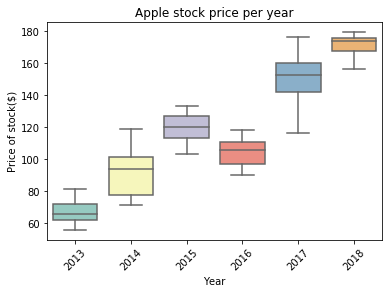

In [28]:
# This box plot shows the average, lowes and highest prices of apple shares through the dates of the data set. 
AppleData2['Year'] = AppleData2['date'].dt.year #Classifying prices by year

sns.boxplot(x = AppleData2.Year,
           y = AppleData2.close,
           palette = "Set3")
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Price of stock($)')
plt.title('Apple stock price per year')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


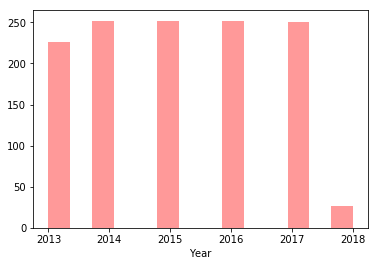

In [4]:
# The following barplot shows the amount of data points per year in the data set
sns.distplot(AppleData2['Year'],
           color = 'red',
           hist = True,
           kde = False)

## Line Regression/Time Series analysis

The following chart shows that the correlation between the values is super high but this is due to their dimilarity during the day.
The difference between open and high sometimes is cents therefore no conclusions can be drawn.

This is the reason a time series analysis was implemented.

In [5]:
AppleData.corr()

,open,high,low,close,volume
open,1.000000,0.999584,0.999515,0.999118,-0.617862
high,0.999584,1.000000,0.999382,0.999584,-0.612622
low,0.999515,0.999382,1.000000,0.999614,-0.625910
close,0.999118,0.999584,0.999614,1.000000,-0.620290
volume,-0.617862,-0.612622,-0.625910,-0.620290,1.000000


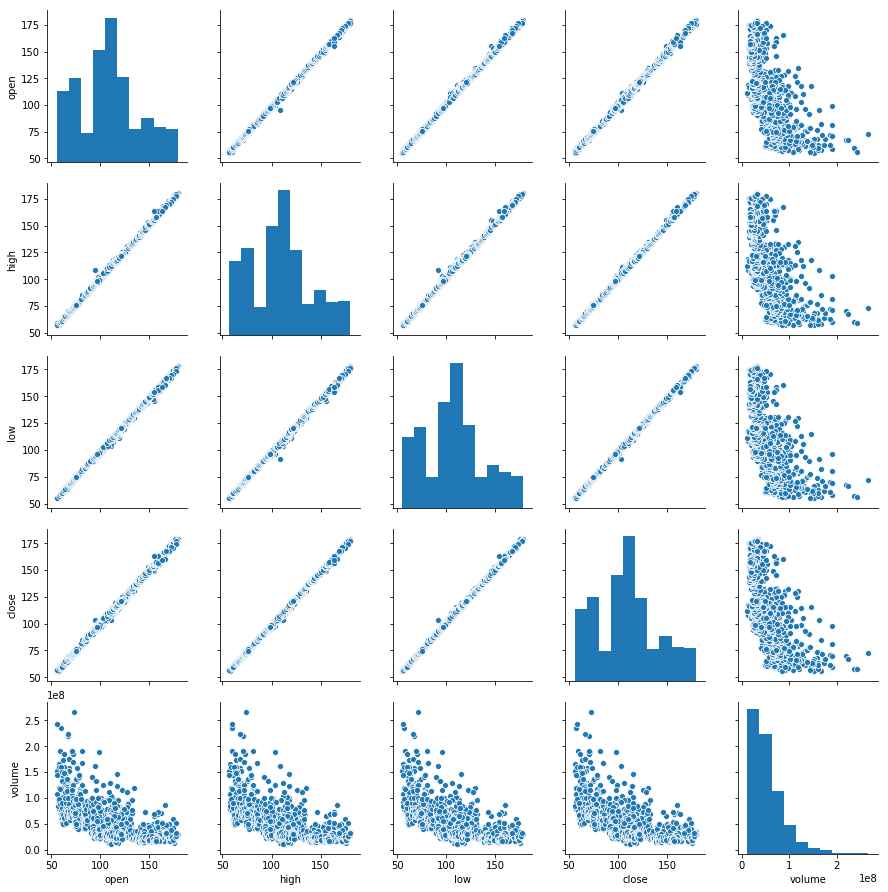

In [6]:
sns.pairplot(AppleData)

<Figure size 864x504 with 0 Axes>

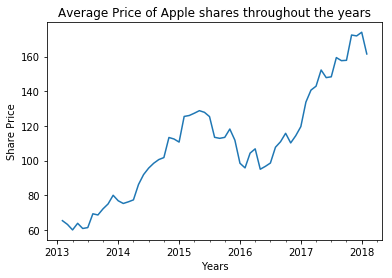

<Figure size 864x504 with 0 Axes>

In [34]:
#Little representation of our values in the data set
%matplotlib inline

AppleData.close.resample('M').mean().plot()

plt.ylabel("Share Price")
plt.xlabel("Years")
plt.title("Average Price of Apple shares throughout the years")

## Splitting the data for the time series model


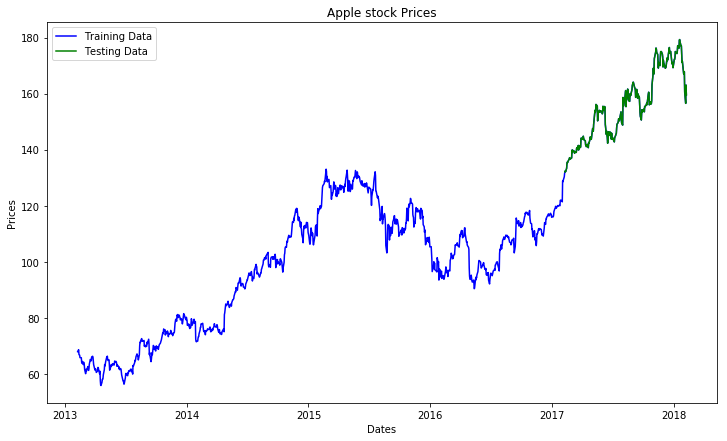

In [31]:
# Here we elect the first 80% of the data set as training data and the rest a test data to prove our model.
df = AppleData
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Apple stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['close'], 'blue', label='Training Data')
plt.plot(test_data['close'], 'green', label='Testing Data')
plt.legend()
# And display the plot of our values

## Building ARIMA model

In [24]:
train_ar = train_data['close'].values
test_ar = test_data['close'].values
history = [x for x in train_ar] # includes all the values in the training portion to create a history of values
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0)) #creates a model based on the values stores in history
    model_fit = model.fit(disp=0)
    output = model_fit.forecast() # Creates a prediction
    yhat = output[0]              # stores the prediciton in a variable for easier use
    predictions.append(yhat)      # Appends each prediciton to this new list
    obs = test_ar[t]              # keeps adding the next value to history, in order to make more accurate predictions
    history.append(obs)           # Where the value is appended
error = mean_squared_error(test_ar, predictions) #Calculates MSE for accuracy
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2) #Calculates SMAPE (Symmetric mean absolute percentage error) for accuracy


<class 'list'>


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

Testing Mean Squared Error: 3.539
Symmetric mean absolute percentage error: 9.075


## Prediction vs Actual Data

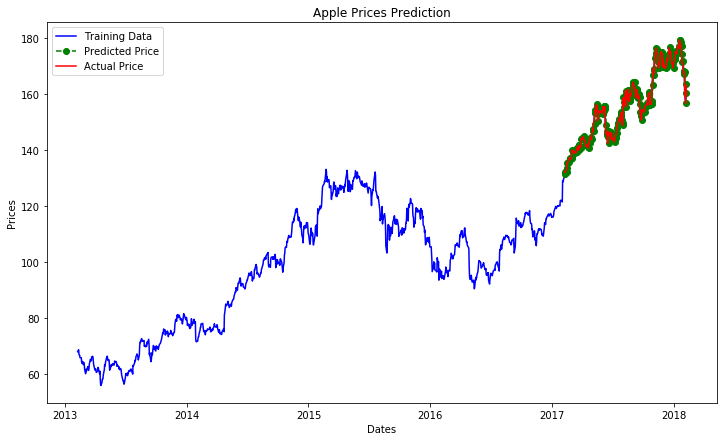

In [27]:
plt.figure(figsize=(12,7))
plt.plot(df['close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['close'], color='red', label='Actual Price')
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## Closer look

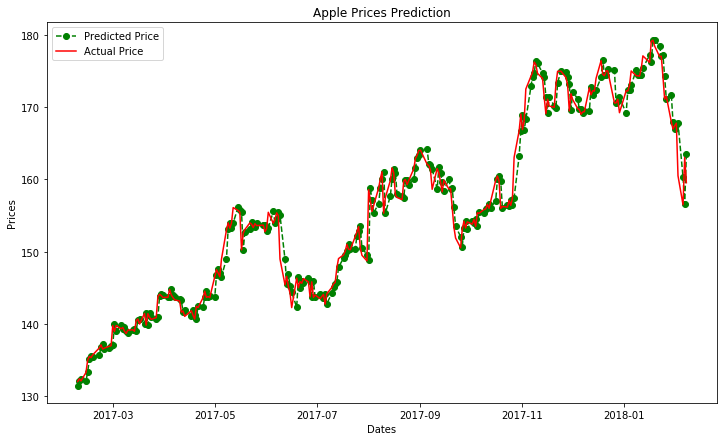

In [29]:
#This plot only shows the data predicted vs the actual. It skips the training set
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['close'], color='red', label='Actual Price')
plt.legend()
plt.title('Apple Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## Conclusion for first model

As shown, an accurate predition of the near future stock price for apple can be performed. In this example, the day's beofre data was input as the model kept building on top of itself. Therefore, for the model to work properly more and more data has to be gathere, especially the day's before. 

#  Second model : Decision Tree

## Arranging data for a Decision tree

in this analysis, I will define some profitable companies based on a simple rule which is that their net income is greater than their net debt.

from there I will utilize other indicators that tells you if a company is profitable like gross margin, return on assets, and EPS, to see if I can predict the profitablity a company based on those.


In [13]:
Data2018 = Data2018.fillna(0) # fills missing values with 0
Data2018['Profitable'] = 'Unknown' # creates new column
Data2018.loc[(Data2018['Net Income']) >= (Data2018['Net Debt']), 'Profitable'] = 'Yes' # Assigns whether the company is profitable or not
                                                                                       # based on the paremeters dicussed above.
Data2018.loc[(Data2018['Net Income']) < (Data2018['Net Debt']), 'Profitable'] = 'No'
Data2018Refined = Data2018[0:(round(len(Data2018)/10))] # sliced the dataset so the decision tree can be better vizualized
Data2018Refined

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class,Profitable
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1,No
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1,No
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1,Yes
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1,Yes
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1,No
5,BAC,9.124700e+10,0.0446,0.000000e+00,9.124700e+10,0.000000e+00,5.338100e+10,5.338100e+10,3.786600e+10,0.000000e+00,...,0.0000,0.0321,0.0029,-0.0008,0.0000,-0.0249,Financial Services,44.315988,1,Yes
6,AAPL,2.655950e+11,0.1586,1.637560e+11,1.018390e+11,1.423600e+10,1.670500e+10,3.094100e+10,7.089800e+10,0.000000e+00,...,-0.1852,-0.0256,-0.1584,-0.0103,0.2293,0.0946,Technology,88.742465,1,Yes
7,MSFT,1.103600e+11,0.1428,3.835300e+10,7.200700e+10,1.472600e+10,2.222300e+10,3.694900e+10,3.505800e+10,0.000000e+00,...,0.2205,0.0341,-0.0512,-0.1066,0.1296,0.1144,Technology,58.259263,1,Yes
8,SIRI,5.770692e+09,0.0637,2.308606e+09,3.462086e+09,1.232190e+08,1.311199e+09,1.735138e+09,1.726948e+09,3.500730e+08,...,0.0892,-0.0188,-0.2371,0.0210,0.0960,0.0314,Consumer Cyclical,22.161943,1,No
9,HPQ,5.847200e+10,0.1233,4.780300e+10,1.066900e+10,1.404000e+09,4.859000e+09,6.605000e+09,4.064000e+09,1.051000e+09,...,0.0477,0.0519,0.8039,-0.2343,0.1798,0.1104,Technology,3.016789,1,Yes


## Selecting indicators and classes


In [14]:
indicators = Data2018Refined[['returnOnAssets', 'EPS', 'Gross Margin']].values
profitability = Data2018Refined[['Profitable']].values

## Creating training a testing data sets

In [15]:
trainIndicators, testIndicators, trainProfitability, testProfitability = train_test_split(indicators, profitability, test_size = 0.3, random_state = 1)


## Build Decision tree

Given the indicators specified, predict profitability.

In [18]:
# Create Decision tree classifier
tree = DecisionTreeClassifier()

#Train the model on training data
model = tree.fit(trainIndicators, trainProfitability)

#Predict Profitability
predictedProfitability = model.predict(testIndicators)

In [19]:
# Create data frame with predictions and ctual results
results = pd.DataFrame ({'Actual': testProfitability.flatten(), 'Predicted': predictedProfitability})
results

,Actual,Predicted
0,No,Yes
1,No,No
2,No,No
3,No,No
4,Yes,Yes
5,Yes,No
6,No,No
7,Yes,Yes
8,No,Yes
9,No,Yes


In [20]:
# Testing for accuracy
print("Accuracy:", metrics.accuracy_score(testProfitability, predictedProfitability))
# important to notice that the model accuary value for the whole dataset is 0.63
# for only a tenth of the values it is the following

Accuracy: 0.5984848484848485


# Visualization of Decision tree 

In [21]:
#install package for vizualization
!pip install pydotplus

     |████████████████████████████████| 286kB 4.6MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp36-none-any.whl size=25389 sha256=12ea4dd15732d6fa3d7a5167e728b4e14bc0f6365c45ff631c93b00a9898c450
  Stored in directory: /home/nbuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
# Loading more libraries to display the decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


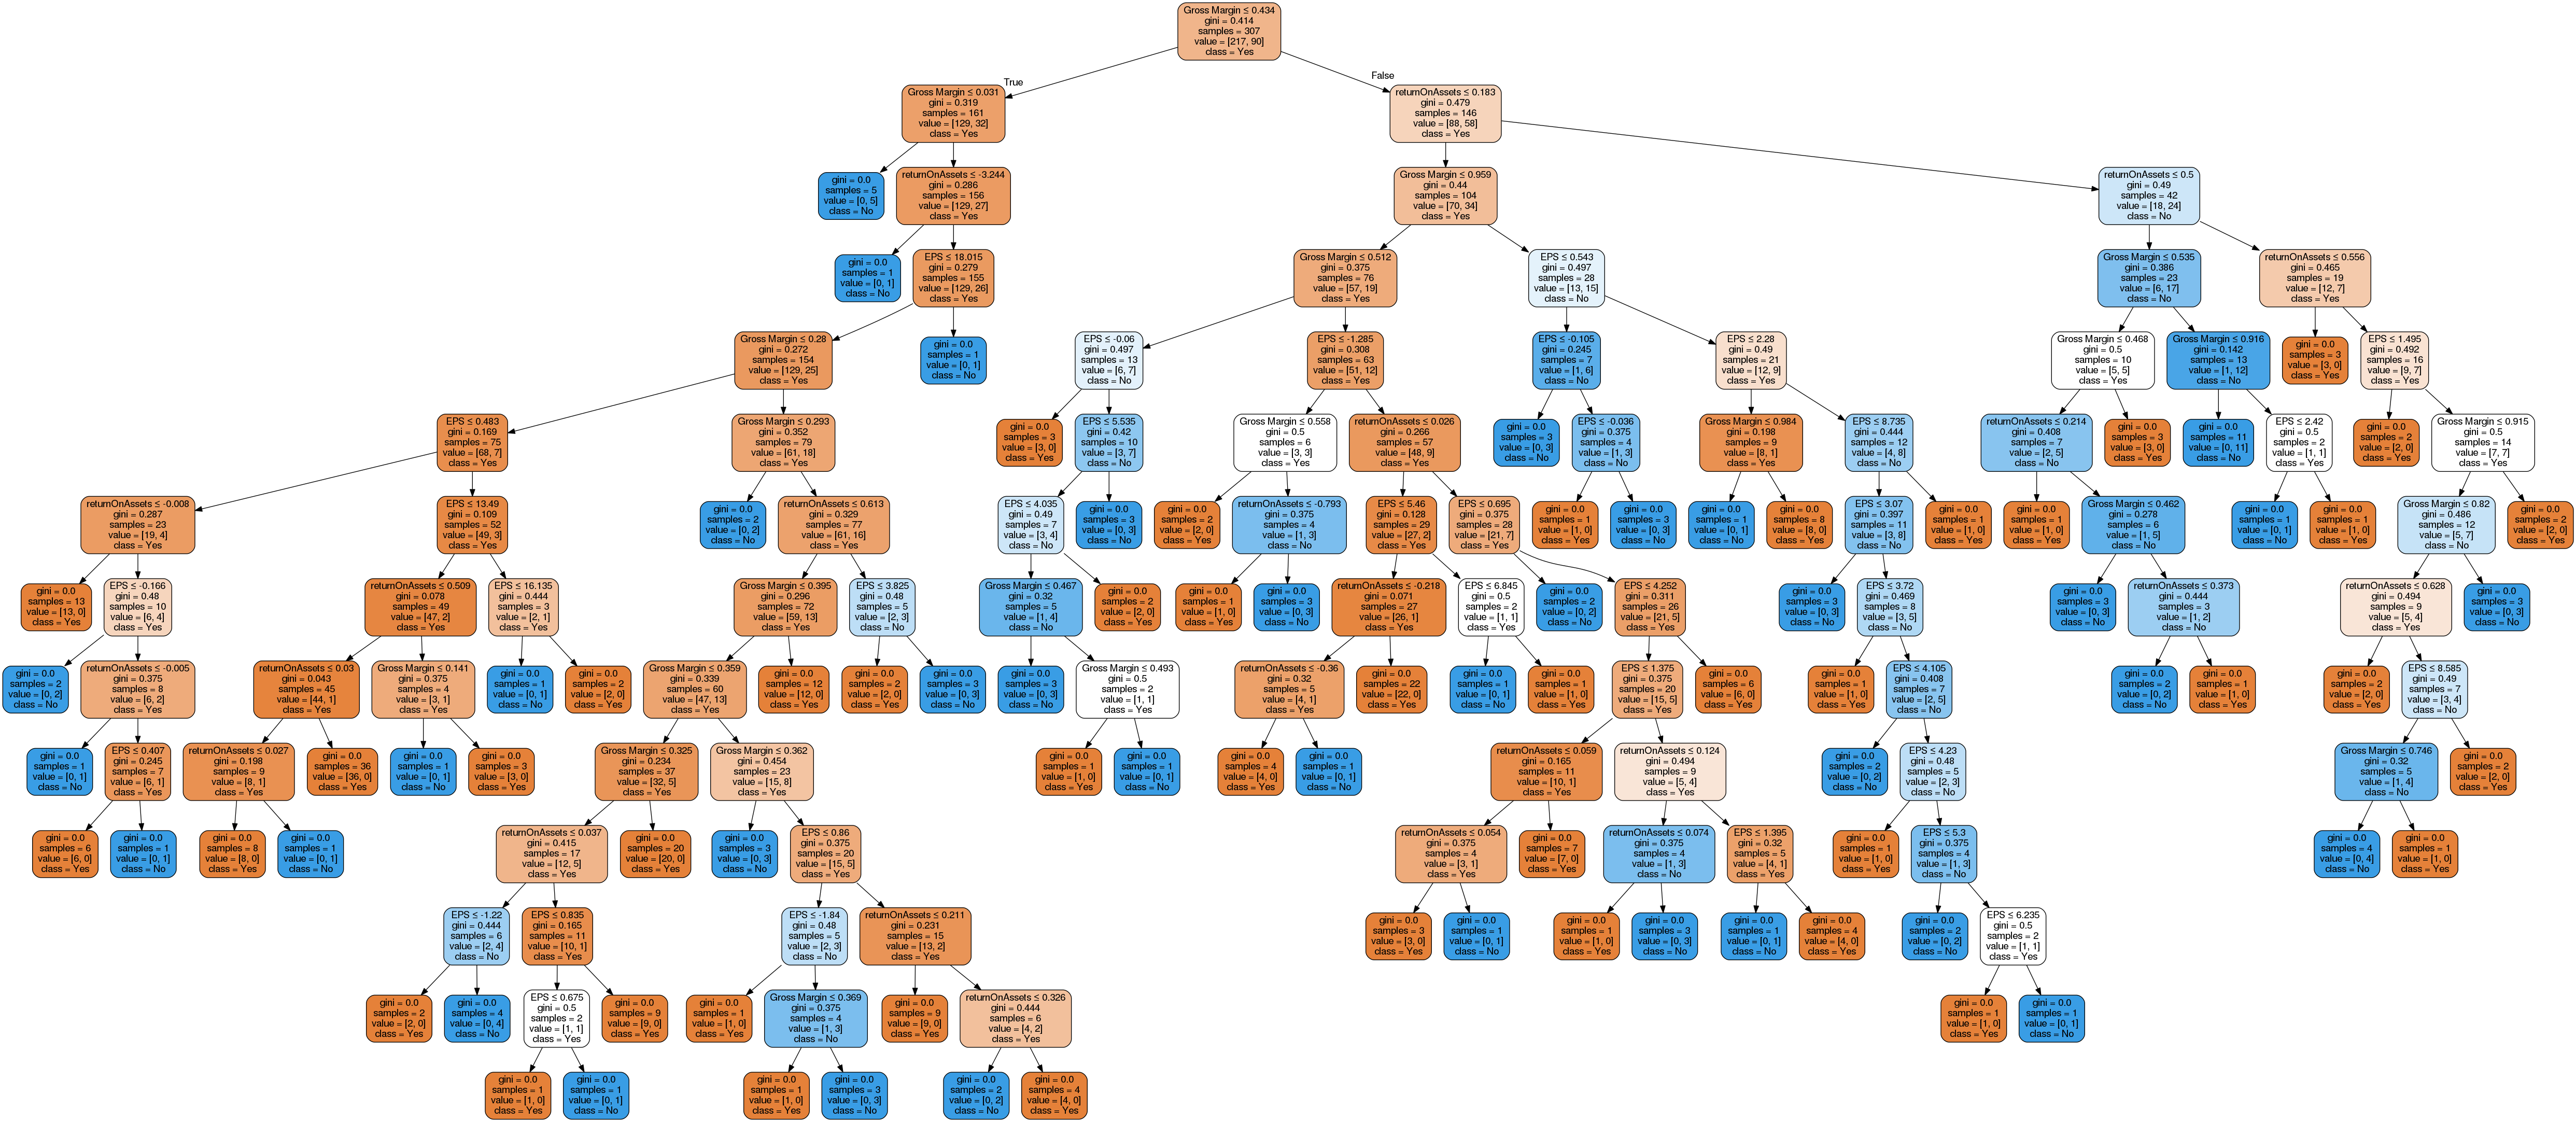

In [23]:
# Prepare labels for the tree
indicators = ['returnOnAssets', 'EPS', 'Gross Margin']
profitable = ['Yes', 'No']

# Generate the graphics
dot_data = StringIO()
export_graphviz(model, out_file = dot_data,
               filled = True, rounded = True,
               special_characters = True,
               feature_names = indicators,
               class_names = profitable)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Write the file to file
graph.write_png('Decision_tree.png')
Image(graph.create_png())

# Conclusion

A viable classification can be made of the profitability of the company with this method. The only problem in the above example was the amount of data to be tested. If the data was less but the model was the same the visualization would be better appreciated.